# Mapeando el Universo





```
# Tiene formato de código
```

## Introducción

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

Link de informacion de campo: 
https://astronomy.stackexchange.com/questions/18986/what-is-the-ugriz-magnitude-system

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
#!pip install autopep8

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

# Utilizar dataset local si existe, sino obtener desde link del mail, data completo.
filename = "data/DiploDatos.csv" if os.path.exists("data/DiploDatos.csv") else "http://iate.oac.uncor.edu/~marioagustin/files/DiploDatos.csv"

In [5]:
df = pd.read_csv(filename,index_col=0) 
df #vistazo para darnos idea de los datos que contiene

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,143.997100,139.90170,137.916400,139.462500,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030
957066087332079616,0.141718,0.000031,0,NaN,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,109.155400,69.38792,71.797840,71.492050,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022
957065537576265728,0.140137,0.000023,0,NaN,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,38.844090,27.95161,26.121520,24.820630,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191
957066911965800448,0.066672,0.000016,0,NaN,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,83.493930,75.81385,77.890850,76.895220,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,...,99.119000,92.17690,95.976270,96.269780,95.24163,0.129051,0.100555,0.069564,0.051693,0.038450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,0.000034,0,NaN,181.48450,11.121100,197.172038,4.453705,0.007364,0.009317,...,7.867717,21.92547,21.725860,24.327620,25.63022,0.116248,0.090580,0.062663,0.046565,0.034636
957077357326264320,0.084226,0.000017,0,STARFORMING,43.81417,17.662850,197.333650,4.462605,0.034636,0.016226,...,86.331560,88.40971,88.990070,89.509990,89.86601,0.131573,0.102520,0.070923,0.052704,0.039202
957066637087893504,0.141610,0.000030,0,NaN,194.91520,11.406040,197.386425,4.364000,0.006467,0.005808,...,99.656110,118.08100,120.961200,121.233000,115.68470,0.139073,0.108365,0.074966,0.055708,0.041437


### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente ha votado si se corresponde con una galaxia espiral, elíptica o irregular.

In [6]:
filename = 'DiploDatos_Zoo.csv'

In [7]:
zoo = pd.read_csv(filename,index_col=0)

In [8]:
#import chardet
#chardet.detect(zoo)

In [9]:
zoo.describe() #Visualizamos el 2do dataset para ver su contenido

,spiral,elliptical,uncertain
count,621957.000000,621957.000000,621957.000000
mean,0.286160,0.093688,0.620152
std,0.451965,0.291395,0.485349
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [10]:
zoo.dtypes

spiral        int64
elliptical    int64
uncertain     int64
dtype: object

Tenemos del primer data 864064 rows × 115 columns y del segundo 621957 rows × 3 columns, se ve la diferencia en filas desde ya. 

In [11]:
dd = df.join(zoo) #Total de 117 columnas mas indice, uniendo todo

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dd.dtypes) #Para ver todas las variables

z                float64
zErr             float64
zWarning           int64
subClass          object
velDisp          float64
velDispErr       float64
ra               float64
dec              float64
raErr            float64
decErr           float64
modelMag_u       float64
modelMag_g       float64
modelMag_r       float64
modelMag_i       float64
modelMag_z       float64
modelMagErr_u    float64
modelMagErr_g    float64
modelMagErr_r    float64
modelMagErr_i    float64
modelMagErr_z    float64
petroMag_u       float64
petroMag_g       float64
petroMag_r       float64
petroMag_i       float64
petroMag_z       float64
petroMagErr_u    float64
petroMagErr_g    float64
petroMagErr_r    float64
petroMagErr_i    float64
petroMagErr_z    float64
petroRad_u       float64
petroRad_g       float64
petroRad_r       float64
petroRad_i       float64
petroRad_z       float64
petroRadErr_u    float64
petroRadErr_g    float64
petroRadErr_r    float64
petroRadErr_i    float64
petroRadErr_z    float64


In [13]:
valores_faltantes = dd.isnull().sum() #Mostramos cantidad de valores faltantes
valores_faltantes[valores_faltantes > 0]

subClass      543479
spiral        242107
elliptical    242107
uncertain     242107
dtype: int64

In [ ]:
len(dd.dropna())/len(dd) #Medimos el impacto de valores faltantes respecto del dataset completo

Las variables espiral, elíptico e incierto aparecen como datos float y anteriormente aparecian como enteros. 

In [14]:
cols=['spiral','elliptical','uncertain']
for col in cols:
    dd[col] = dd[col].fillna(0) #Completamos con ceros
dd[cols] #visualización

,spiral,elliptical,uncertain
specObjID,,,
957075158303008768,0.0,0.0,1.0
957066087332079616,0.0,0.0,1.0
957065537576265728,1.0,0.0,0.0
957066911965800448,0.0,1.0,0.0
957067186843707392,0.0,0.0,0.0
...,...,...,...
957077632204171264,0.0,0.0,1.0
957077357326264320,1.0,0.0,0.0
957066637087893504,1.0,0.0,0.0


In [15]:
#Verificamos si hay suma cuando no hay numero 
print(dd[cols].isna().sum())

spiral        0
elliptical    0
uncertain     0
dtype: int64


In [16]:
for col in cols: #Para amntener el tipo de dato que en el data origen
    dd[col] = dd[col].apply(np.int64)
    
    print(dd[col].dtypes)

int64
int64
int64


In [17]:
np.random.seed(0) #Visualización random de los datos
dd.sample(20)

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
1445684663346554880,0.392297,0.000124,0,NaN,241.41100,39.437110,207.406399,47.277051,0.022369,0.023484,...,148.359900,153.849600,0.078586,0.061233,0.042361,0.031479,0.023414,0,0,0
1810508675501025280,0.000000,0.000000,134,NaN,0.00000,-4.000000,174.541651,11.953476,0.007857,0.010299,...,158.434200,161.583100,0.109422,0.085261,0.058983,0.043831,0.032602,0,0,0
2429734400779380736,0.067747,0.000016,0,NaN,199.25270,6.855377,229.991390,22.303462,0.004297,0.003908,...,121.811900,118.582700,0.203872,0.158856,0.109896,0.081664,0.060743,0,0,1
1148587550298892288,0.151148,0.000033,0,NaN,278.87660,12.458340,189.839791,55.874522,0.004604,0.004592,...,120.321800,109.886200,0.067083,0.052270,0.036160,0.026871,0.019987,0,0,1
1574068320808757248,0.399303,0.000106,0,NaN,216.68500,28.099380,225.467646,38.930935,0.021594,0.021685,...,58.671850,64.864110,0.046941,0.036576,0.025303,0.018803,0.013986,0,0,0
2728186110894172160,0.051212,0.000008,0,STARFORMING,0.00000,28.732210,125.447347,10.954466,0.017953,0.019623,...,21.756360,20.957490,0.114868,0.089505,0.061919,0.046012,0.034225,0,0,1
2030142187475331072,0.121693,0.000020,0,NaN,150.68460,7.449923,206.482734,7.824379,0.004975,0.005646,...,180.450200,5.912766,0.111734,0.087062,0.060229,0.044757,0.033291,0,0,1
2383620331777583104,0.076525,0.000012,0,NaN,195.80050,5.590571,208.127632,32.732305,0.003256,0.003245,...,41.428440,35.995830,0.061800,0.048154,0.033313,0.024755,0.018413,0,0,1
1160897690049996800,0.125968,0.000008,0,STARFORMING,93.91045,22.527390,326.650771,0.628517,0.018735,0.020989,...,163.951600,0.029195,0.386966,0.301522,0.208591,0.155006,0.115296,0,0,0


In [18]:
dd.describe() #Se ven solo los numéricos

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,...,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000
mean,0.146665,0.006212,0.506687,152.105125,19.082283,180.984622,23.169815,0.019396,0.019141,19.357238,...,89.506825,88.710756,0.148097,0.115396,0.079831,0.059323,0.044125,0.205979,0.067437,0.446388
std,0.112969,0.983079,7.928166,99.785205,21.410615,68.994142,19.353401,0.100562,0.101299,87.577074,...,97.135783,100.143786,0.175970,0.137115,0.094855,0.070488,0.052430,0.404415,0.250778,0.497118
min,-0.011088,-6.000000,0.000000,0.000000,-7.000000,0.000672,-11.252825,0.000438,0.000341,-9999.000000,...,-9999.008000,-10000.210000,0.012519,0.009755,0.006748,0.005015,0.003730,0.000000,0.000000,0.000000
25%,0.073795,0.000012,0.000000,87.723450,9.822191,145.630565,6.390797,0.006289,0.006177,19.136530,...,47.551773,48.464130,0.079351,0.061830,0.042773,0.031785,0.023642,0.000000,0.000000,0.000000
50%,0.115355,0.000021,0.000000,142.108400,13.798750,183.556438,21.064065,0.010219,0.010032,19.879295,...,90.660525,89.476295,0.118164,0.092072,0.063695,0.047332,0.035207,0.000000,0.000000,0.000000
75%,0.175229,0.000035,0.000000,202.606025,21.750100,221.970898,37.825780,0.019530,0.019184,20.718253,...,132.924200,130.529275,0.176289,0.137363,0.095027,0.070615,0.052525,0.000000,0.000000,1.000000
max,1.002166,635.625600,148.000000,850.000000,2262.742000,359.997922,71.767356,84.120962,80.475913,31.771320,...,258.219200,257.719100,28.182430,21.959560,15.191520,11.288930,8.396889,1.000000,1.000000,1.000000


In [19]:
dd.describe(include=['object']) #Observamos solamente las subclases

,subClass
count,320585
unique,7
top,STARFORMING
freq,230463


## 1. Exploración y análisis general de los datos

1.1 Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
1.2 Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?

Tenemos 5 mil identificaciones , descritos en 118 columnas, 114 del 1er dataframe y 3 del segundo. 

A continuacion, se muestran las variables, tipo y significado:


Considerando el objetivo pricipal de la mentoría que es determinar el corrimiento al rojo (redshift) de galaxias 
a partir de datos fotométricos, las columnas que mas importan son separadas en un nuevo dataset. 
Con el desarrollo del trabajo se vera si es necasario sumar alguna nueva variable al conjunto elegido.

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dd.dtypes) #Para ver todas las variables y como quedo todo

z                float64
zErr             float64
zWarning           int64
subClass          object
velDisp          float64
velDispErr       float64
ra               float64
dec              float64
raErr            float64
decErr           float64
modelMag_u       float64
modelMag_g       float64
modelMag_r       float64
modelMag_i       float64
modelMag_z       float64
modelMagErr_u    float64
modelMagErr_g    float64
modelMagErr_r    float64
modelMagErr_i    float64
modelMagErr_z    float64
petroMag_u       float64
petroMag_g       float64
petroMag_r       float64
petroMag_i       float64
petroMag_z       float64
petroMagErr_u    float64
petroMagErr_g    float64
petroMagErr_r    float64
petroMagErr_i    float64
petroMagErr_z    float64
petroRad_u       float64
petroRad_g       float64
petroRad_r       float64
petroRad_i       float64
petroRad_z       float64
petroRadErr_u    float64
petroRadErr_g    float64
petroRadErr_r    float64
petroRadErr_i    float64
petroRadErr_z    float64


No hubieron problemas con los tipos de datos detectados

In [21]:
# Viendo la cantidad de variables
print("Hay ", dd.shape[0], "filas y ", dd.shape[1], "columnas. Es decir, hay ", dd.shape[0], "datasamples y ",dd.shape[1], "variables")
print(dd.columns)

Hay  864064 filas y  118 columnas. Es decir, hay  864064 datasamples y  118 variables
Index(['z', 'zErr', 'zWarning', 'subClass', 'velDisp', 'velDispErr', 'ra',
       'dec', 'raErr', 'decErr',
       ...
       'expPhi_i', 'expPhi_z', 'extinction_u', 'extinction_g', 'extinction_r',
       'extinction_i', 'extinction_z', 'spiral', 'elliptical', 'uncertain'],
      dtype='object', length=118)


Considerando el objetivo pricipal de la mentoría que es determinar el corrimiento al rojo (redshift) de galaxias 
a partir de datos fotométricos, las columnas que mas importan son separadas en un nuevo dataset. 
Con el desarrollo del trabajo se vera si es necasario sumar alguna nueva variable al conjunto elegido.

In [22]:
#Seleccionamos las columnas importantes. 
important_cols = ["z","velDisp","ra","dec","modelMag_u","modelMag_g","modelMag_r","modelMag_i","modelMag_z","petroMag_u",
                  "petroMag_g","petroMag_r","petroMag_i","petroMag_z","petroRad_u", "petroRad_g", "petroRad_r","petroRad_i", "petroRad_z",
                  "petroR50_u","petroR50_g","petroR50_r","petroR50_i","petroR50_z","petroR90_u","petroR90_g","petroR90_r","petroR90_i",
                  "petroR90_z", "deVRad_u","deVRad_g","deVRad_r","deVRad_i","deVRad_z","deVAB_u","deVAB_g","deVAB_r","deVAB_i",
                  "deVAB_z","deVPhi_u","deVPhi_g","deVPhi_r","deVPhi_i","deVPhi_z","expRad_u","expRad_g","expRad_r","expRad_i",
                  "expRad_z","expAB_u","expAB_g","expAB_r","expAB_i","expAB_z","expPhi_u","expPhi_g","expPhi_r","expPhi_i","expPhi_z",
                  "extinction_u","extinction_g","extinction_r","extinction_i", "extinction_z","spiral","elliptical","uncertain"]

len(important_cols)

67

In [23]:
nuevo_data= dd[important_cols] #Armamos un nuevo dataset y lo visualizamos

In [24]:
#Exploramos los valores minimos y maximos
print ( "A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:")
for col_name in important_cols:
    print ('{: <25}'.format(col_name.upper()),
           "MIN = {:6.2f}".format(nuevo_data[col_name].min())," ",
           "MAX = {:6.2f}".format(nuevo_data[col_name].max())," ")

A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:
Z                         MIN =  -0.01   MAX =   1.00  
VELDISP                   MIN =   0.00   MAX = 850.00  
RA                        MIN =   0.00   MAX = 360.00  
DEC                       MIN = -11.25   MAX =  71.77  
MODELMAG_U                MIN = -9999.00   MAX =  31.77  
MODELMAG_G                MIN = -9999.00   MAX =  32.30  
MODELMAG_R                MIN = -9999.00   MAX =  33.85  
MODELMAG_I                MIN = -9999.00   MAX =  32.10  
MODELMAG_Z                MIN = -9999.00   MAX =  29.18  
PETROMAG_U                MIN = -9999.00   MAX =  41.27  
PETROMAG_G                MIN = -9999.00   MAX =  36.99  
PETROMAG_R                MIN = -9999.00   MAX =  37.20  
PETROMAG_I                MIN = -9999.00   MAX =  37.01  
PETROMAG_Z                MIN = -9999.00   MAX =  37.49  
PETRORAD_U                MIN =   0.00   MAX = 258.57  
PETRORAD_G                MIN =   0.00   MAX = 

In [25]:
nuevo_data[nuevo_data.duplicated()] #Revisamos valores duplicados y mostramos en caso de que haya alguno

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,


In [26]:
pd.Series(nuevo_data.index,dtype=str).describe() #revisamos IDs uplicados

count                  864064
unique                 864064
top       1650581134905468928
freq                        1
Name: specObjID, dtype: object

Como salen los mismoos valores para unique y count, se entiende que no hay IDs duplicados.

In [27]:
nuevo_data[nuevo_data.index.duplicated()] #Confirmamos lo anterior

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,


## 2. Análisis estadístico

In [29]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

2.1. Es la distribución de galaxia uniforme sobre la bóveda celeste?

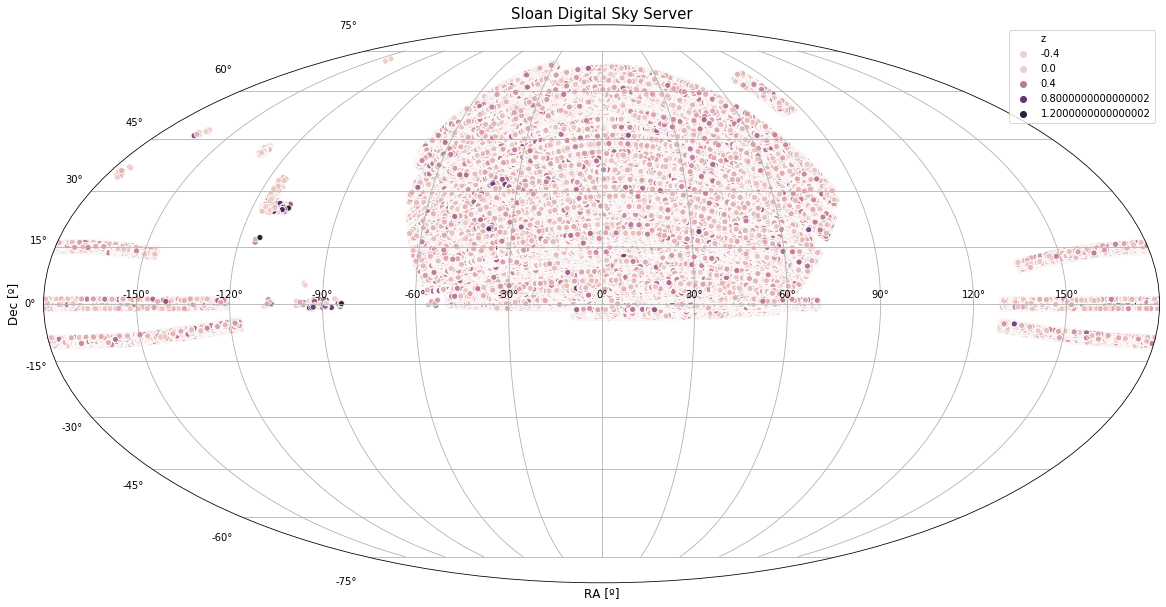

In [30]:
f = plt.figure(figsize=(20,15))
ax = f.add_subplot(111,projection="mollweide")

sns.scatterplot(x=np.radians(dd['ra'])-np.pi,y=np.radians(dd['dec']),data=dd,hue='z',ax=ax)
plt.grid(True)

ax.set_title('Sloan Digital Sky Server')
ax.title.set_fontsize(15)
ax.set_xlabel("RA [º]")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("Dec [º]")
ax.yaxis.label.set_fontsize(12)

plt.show()

Considerando el grafico y que: 

"Data Release 16 is the fourth data release of the fourth phase of the Sloan Digital Sky Survey. It includes SDSS data taken through August 2018, and *encompasses more than one-third of the entire celestial sphere*." - (obtenido de: https://www.sdss.org/dr16/scope/ )

La distribucion dada por el dataset no sera uniforme debido a que el dataset no comprente datos de toda la bobeda celeste.

---
2.2 Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.

In [32]:
#rebanda=nuevo_data[nuevo_data.ra > 150][nuevo_data.ra < 200]
rebanada=nuevo_data[(dd.ra > 150) & (nuevo_data.ra < 200)]

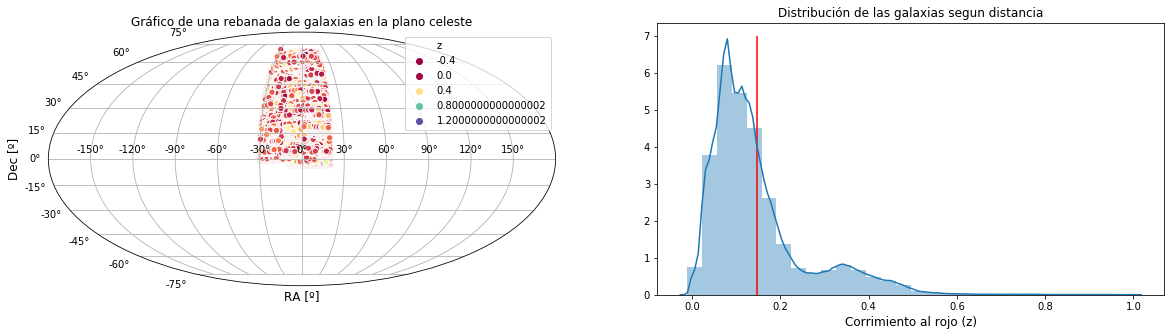

In [33]:
plt.figure(figsize=(20,5))
ax=plt.subplot(121, projection="mollweide")
#ax = f.add_subplot(111,projection="mollweide")
sns.scatterplot(x=np.radians(rebanada['ra'])-np.pi,
                y=np.radians(rebanada['dec']),
                data=rebanada,
                hue='z',ax=ax,
                palette='Spectral')
plt.grid(True)
ax.set_title('Gráfico de una rebanada de galaxias en la plano celeste')
ax.title.set_fontsize(12)
ax.set_xlabel("RA [º]")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("Dec [º]")
ax.yaxis.label.set_fontsize(12)


bx=plt.subplot(122)# Gráfico de la densidad, distribución.
n=30
sns.distplot(nuevo_data['z'], bins=n,label='z')#, color=BLUE)
plt.vlines(nuevo_data.z.mean(),0.0,7.0,'r',label='media')
bx.set_title('Distribución de las galaxias segun distancia')
bx.title.set_fontsize(12)
bx.set_xlabel("Corrimiento al rojo (z)")
bx.xaxis.label.set_fontsize(12)

---
2.3. Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?

Tomaremos las bandas "ModelMag"

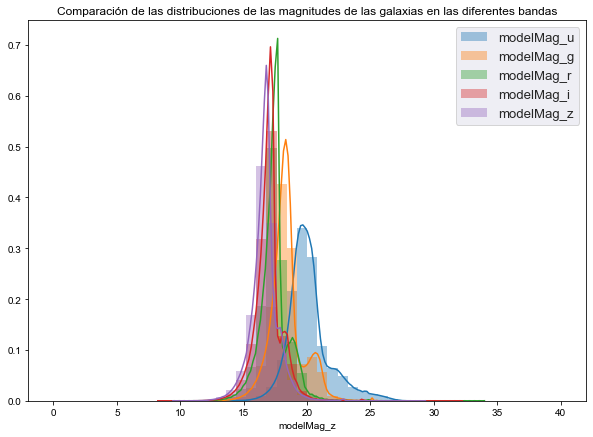

In [34]:
plt.figure(figsize=(10,7))

range = [0,40.0]
sns.distplot(dd['modelMag_u'],kde_kws={'clip':range},hist_kws={'range':range},label='modelMag_u')

sns.distplot(dd['modelMag_g'],kde_kws={'clip':range},hist_kws={'range':range},label='modelMag_g')

sns.distplot(dd['modelMag_r'],kde_kws={'clip':range},hist_kws={'range':range},label='modelMag_r')

sns.distplot(dd['modelMag_i'],kde_kws={'clip':range},hist_kws={'range':range},label='modelMag_i')

sns.distplot(dd['modelMag_z'],kde_kws={'clip':range},hist_kws={'range':range},label='modelMag_z')

# var = dd['modelColor_ug'][elipticas].clip(0.5,3.0)
# plt.vlines(var.mean(),0.0,2.0,'b')

# var = dd['modelColor_ug'][espirales].clip(0.5,3.0)
# plt.vlines(var.median(),0.0,2.0,'r')

# var = dd['modelColor_ug'][irregulares].clip(0.5,3.0)
# plt.vlines(var.median(),0.0,2.0,'g')
plt.title('Comparación de las distribuciones de las magnitudes de las galaxias en las diferentes bandas')
sns.set(font_scale=1.2) 
plt.legend()

Las bandas tienen una distribucion muy similar entre ellas. Asimilan una distribucion normal.

---
2.4. Cuál es la distribución del corrimiento al rojo de las galaxias?

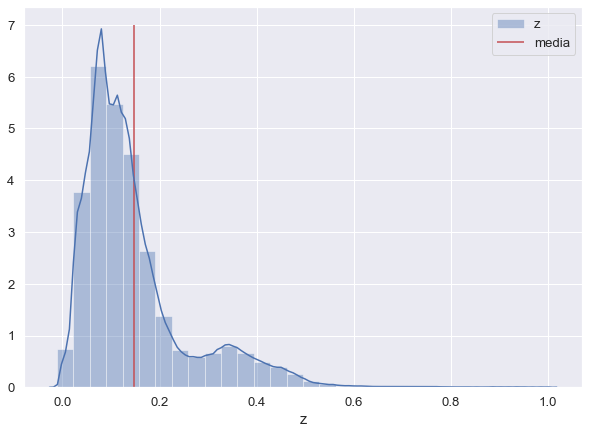

In [35]:
plt.figure(figsize=(10,7)) # Gráfico de la densidad, distribución. 
n=30
sns.distplot(dd.z, kde=True, bins=n, label='z')
plt.vlines(dd.z.mean(),0.0,7.0,'r',label='media')
plt.legend()

La distribucion de 'Z' asimila una distribucion de forma **normal**. La media no coincide con el pico del grafico muy probablemente por los valores outliers de 'Z' cerca de 0.30

---
2.5 Existe correlación entre las diferentes variables?

Calculamos los coeficientes de Correlación de Spearman, (Pearson solo se usa si hay distribucion normal) 
y mostramos los resultados en una matriz. 
Cuanto más cercano a +-1 es el valor, mayor correlación hay 
y cuanto más cercano a cero el valor, menor correlación entre las variables hay.

In [36]:
nuevo_data

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,60.39996,197.448850,4.249896,18.10708,17.34184,17.08753,16.99253,16.87547,18.57100,...,139.462500,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030,0,0,1
957066087332079616,0.141718,217.80020,197.458925,4.451149,19.56142,17.60611,16.52897,16.07807,15.72277,19.88646,...,71.492050,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022,0,0,1
957065537576265728,0.140137,138.90830,197.473340,4.417710,19.56201,18.19559,17.34286,16.92395,16.61079,19.36260,...,24.820630,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191,1,0,0
957066911965800448,0.066672,241.28300,197.583262,4.300230,18.38973,16.40218,15.47812,15.05008,14.72299,18.41023,...,76.895220,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920,0,1,0
957067186843707392,0.183667,118.87630,197.601252,4.397977,19.44434,18.39804,17.81157,17.45442,17.30775,19.48579,...,96.269780,95.24163,0.129051,0.100555,0.069564,0.051693,0.038450,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,181.48450,197.172038,4.453705,20.00012,18.02587,16.99366,16.55089,16.24613,19.22691,...,24.327620,25.63022,0.116248,0.090580,0.062663,0.046565,0.034636,0,0,1
957077357326264320,0.084226,43.81417,197.333650,4.462605,19.42239,17.90961,17.23364,16.85341,16.60565,19.38062,...,89.509990,89.86601,0.131573,0.102520,0.070923,0.052704,0.039202,1,0,0
957066637087893504,0.141610,194.91520,197.386425,4.364000,20.68069,18.52292,17.42307,16.97244,16.64187,20.63907,...,121.233000,115.68470,0.139073,0.108365,0.074966,0.055708,0.041437,1,0,0


In [37]:
nuevo_data.dtypes

z               float64
velDisp         float64
ra              float64
dec             float64
modelMag_u      float64
                 ...   
extinction_i    float64
extinction_z    float64
spiral            int64
elliptical        int64
uncertain         int64
Length: 67, dtype: object

In [38]:
corr=nuevo_data.corr(method="spearman").round(2)
corr

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
z,1.00,0.64,-0.05,-0.04,0.78,0.77,0.62,0.55,0.50,0.73,...,-0.00,-0.01,0.03,0.03,0.03,0.03,0.03,-0.23,0.04,-0.22
velDisp,0.64,1.00,-0.01,0.03,0.55,0.40,0.17,0.10,0.03,0.51,...,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.25,0.24,-0.11
ra,-0.05,-0.01,1.00,0.04,-0.05,-0.06,-0.07,-0.07,-0.07,-0.05,...,0.25,0.26,-0.03,-0.03,-0.03,-0.03,-0.03,0.03,0.01,0.02
dec,-0.04,0.03,0.04,1.00,-0.11,-0.13,-0.14,-0.14,-0.14,-0.11,...,-0.02,-0.01,-0.57,-0.57,-0.57,-0.57,-0.57,0.06,0.03,0.10
modelMag_u,0.78,0.55,-0.05,-0.11,1.00,0.93,0.79,0.73,0.66,0.96,...,-0.01,-0.01,0.13,0.13,0.13,0.13,0.13,-0.30,-0.04,-0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
extinction_i,0.03,-0.01,-0.03,-0.57,0.13,0.14,0.14,0.12,0.11,0.13,...,-0.03,-0.04,1.00,1.00,1.00,1.00,1.00,-0.05,-0.02,-0.08
extinction_z,0.03,-0.01,-0.03,-0.57,0.13,0.14,0.14,0.12,0.11,0.13,...,-0.03,-0.04,1.00,1.00,1.00,1.00,1.00,-0.05,-0.02,-0.08
spiral,-0.23,-0.25,0.03,0.06,-0.30,-0.29,-0.26,-0.26,-0.25,-0.30,...,-0.00,0.00,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.14,-0.46
elliptical,0.04,0.24,0.01,0.03,-0.04,-0.10,-0.19,-0.21,-0.23,-0.04,...,-0.00,-0.00,-0.02,-0.02,-0.02,-0.02,-0.02,-0.14,1.00,-0.24


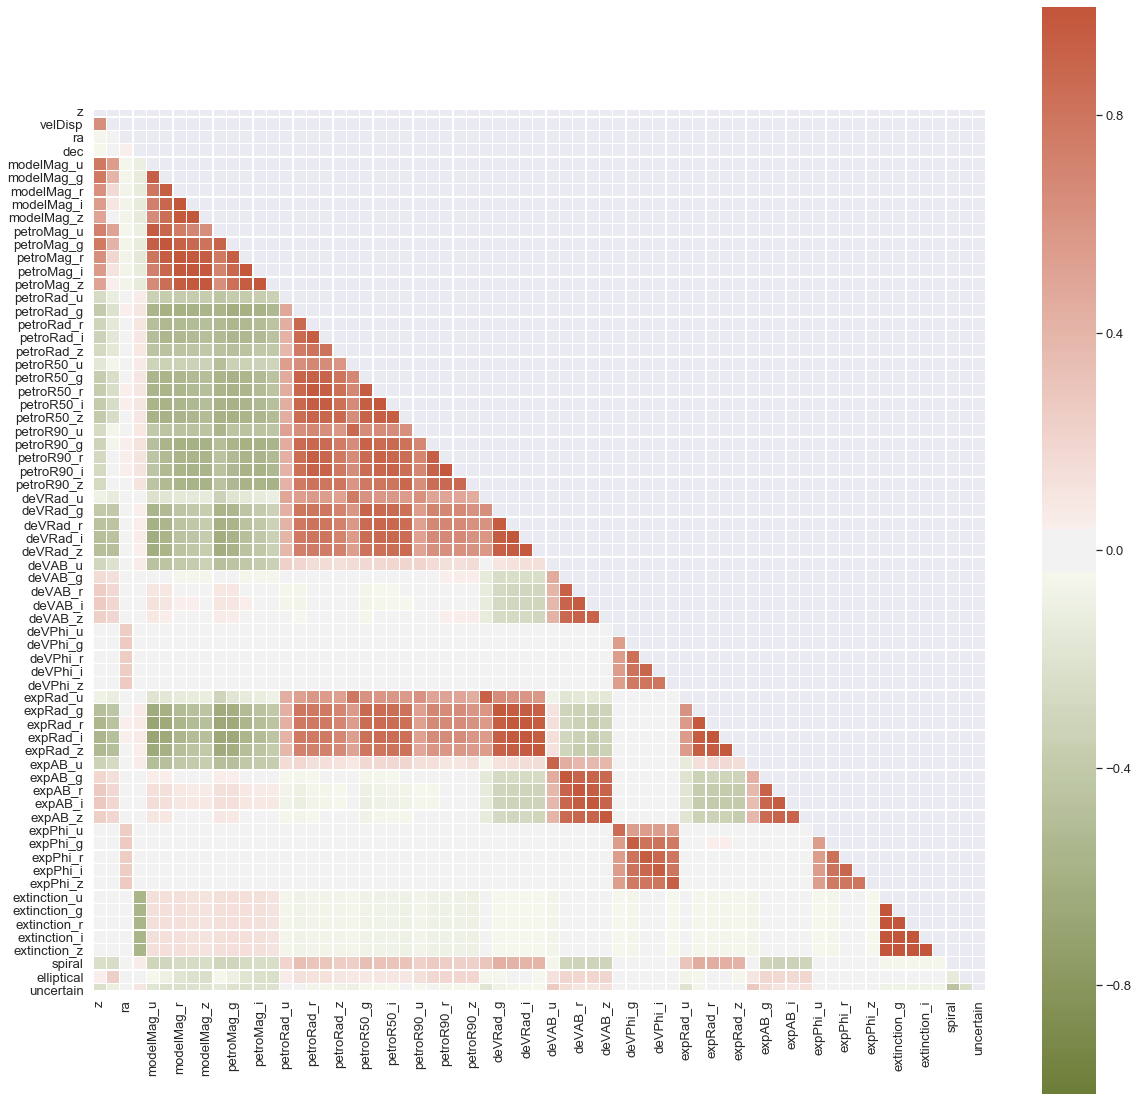

In [39]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,
            mask=mask,
            cmap=sns.diverging_palette(100, 20, as_cmap=True), #probar colores y s,l.
            center=0,
            vmax=1.0,
            vmin=-1.0, 
            square=True,
            linewidths=.3)

Del grafico, podemos ver las variables que se peuden quitar de la matriz de correlaciones. En este caso los deVAB, deVPhi, expAB, expPhi, extinction y las morfologicas. 

In [44]:
#Limpiamos las columnas importantes. 
important_cols1 = ["z","velDisp","ra","dec","modelMag_u","modelMag_g",
                  "modelMag_r","modelMag_i","modelMag_z","petroMag_u",
                  "petroMag_g","petroMag_r","petroMag_i","petroMag_z",
                  "petroRad_u","petroRad_g", "petroRad_r","petroRad_i", 
                  "petroRad_z","petroR50_u","petroR50_g","petroR50_r",
                  "petroR50_i","petroR50_z","petroR90_u","petroR90_g",
                  "petroR90_r","petroR90_i","petroR90_z","expRad_u",
                  "expRad_g","expRad_r","expRad_i","expRad_z"]
len(important_cols1)

34

In [45]:
nuevo_data1=nuevo_data[important_cols1]

In [46]:
corr1=nuevo_data1.corr(method="spearman").round(2)
corr1

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,petroR90_u,petroR90_g,petroR90_r,petroR90_i,petroR90_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z
z,1.00,0.64,-0.05,-0.04,0.78,0.77,0.62,0.55,0.50,0.73,...,-0.26,-0.32,-0.28,-0.28,-0.28,-0.08,-0.49,-0.54,-0.55,-0.53
velDisp,0.64,1.00,-0.01,0.03,0.55,0.40,0.17,0.10,0.03,0.51,...,-0.06,-0.06,-0.01,-0.01,-0.01,-0.12,-0.43,-0.46,-0.47,-0.49
ra,-0.05,-0.01,1.00,0.04,-0.05,-0.06,-0.07,-0.07,-0.07,-0.05,...,0.03,0.04,0.04,0.04,0.03,0.00,0.03,0.04,0.04,0.03
dec,-0.04,0.03,0.04,1.00,-0.11,-0.13,-0.14,-0.14,-0.14,-0.11,...,0.08,0.12,0.11,0.11,0.11,0.03,0.07,0.07,0.07,0.05
modelMag_u,0.78,0.55,-0.05,-0.11,1.00,0.93,0.79,0.73,0.66,0.96,...,-0.40,-0.47,-0.43,-0.43,-0.44,-0.19,-0.63,-0.68,-0.68,-0.65
modelMag_g,0.77,0.40,-0.06,-0.13,0.93,1.00,0.94,0.89,0.84,0.89,...,-0.44,-0.56,-0.52,-0.52,-0.52,-0.17,-0.60,-0.65,-0.65,-0.60
modelMag_r,0.62,0.17,-0.07,-0.14,0.79,0.94,1.00,0.99,0.97,0.75,...,-0.46,-0.60,-0.57,-0.57,-0.57,-0.14,-0.51,-0.55,-0.55,-0.48
modelMag_i,0.55,0.10,-0.07,-0.14,0.73,0.89,0.99,1.00,0.99,0.70,...,-0.46,-0.60,-0.57,-0.58,-0.58,-0.13,-0.47,-0.51,-0.51,-0.44
modelMag_z,0.50,0.03,-0.07,-0.14,0.66,0.84,0.97,0.99,1.00,0.64,...,-0.45,-0.59,-0.56,-0.56,-0.58,-0.12,-0.44,-0.47,-0.47,-0.40
petroMag_u,0.73,0.51,-0.05,-0.11,0.96,0.89,0.75,0.70,0.64,1.00,...,-0.55,-0.50,-0.46,-0.46,-0.46,-0.31,-0.63,-0.67,-0.67,-0.64


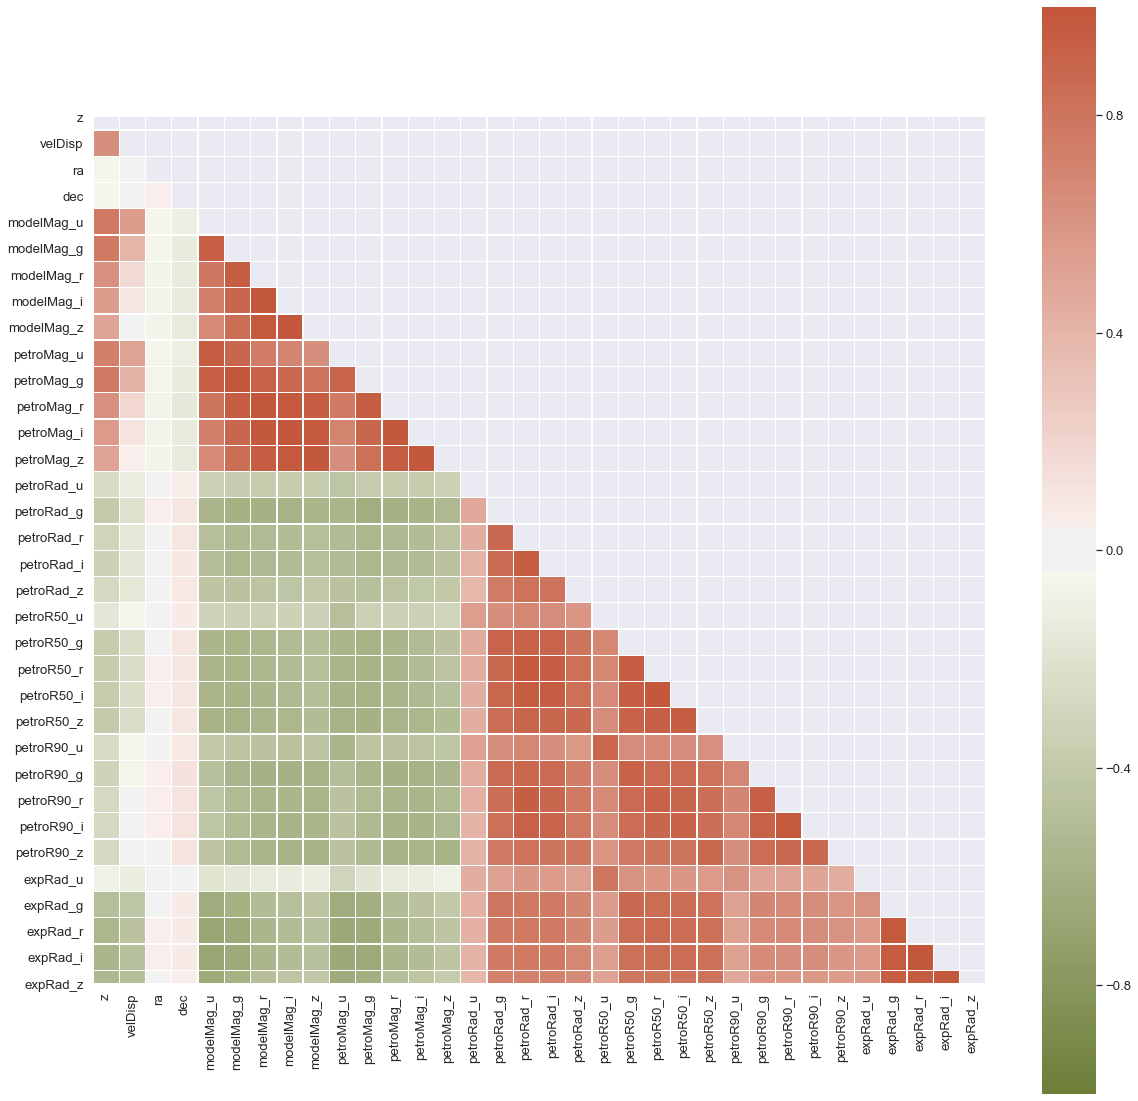

In [47]:
mask1 = np.triu(np.ones_like(corr1, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr1,
            mask=mask1,
            cmap=sns.diverging_palette(100, 20, as_cmap=True), #probar colores y s,l.
            center=0,
            vmax=1.0,
            vmin=-1.0, 
            square=True,
            linewidths=.3)

2.6 Realicen gráficos boxplot para identificar outliers. (Se podrian hacer subplot de todos los boxplots)

In [ ]:
for column in dd.columns:
    if 'Err' not in column:
        if ('Mag' in column) \
        or ('Rad' in column) \
        or ('extinction' in column):
            sns.boxplot(x=dd[column], data=dd)
            plt.show()
            
#Ver que variaciones son las que influyen en el z redshift

Hay valores de outliers muy lejanos a los demás outliers, lo que dificultan la interpretración del gráfico. Estos valores serán removidos para mejor visualización

for column in dd.columns:
    if 'Err' not in column:
        if ('Mag' in column) \
        or ('Rad' in column) \
        or ('extinction' in column):
            dd= dd[dd[column] >= 0]
            sns.boxplot(x=dd[column], data=dd)
            plt.show()

Todos las magnitudes y radios presentan outliers muy lejanos a los valores máximos y mínimos correspondientes


2.7 Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?

Se crea una nueva columna en dd para tener la morfología de cada medición. Como solo tenemos 5000 valores con morofología, los demás sin mediciones se clasificarán en 'Non classified'


In [ ]:
dd['morphology'] = np.where(dd.spiral == 1, 'spiral', 'Non classified')
dd['morphology'] = np.where(dd.elliptical == 1, 'elliptical', dd['morphology'])
dd['morphology'] = np.where(dd.uncertain == 1, 'uncertain', dd['morphology'])

In [ ]:
for column in dd.columns:
    if ('petroMag_u' in column) or ('modelMag_u' in column):
        if 'Err' not in column:
            col_name= column.split('_')[0]
            ug= dd[column] - dd['{}_g'.format(col_name)]
            gr= dd['{}_g'.format(col_name)] - dd['{}_r'.format(col_name)]
            ri= dd['{}_r'.format(col_name)] - dd['{}_i'.format(col_name)]
            iz= dd['{}_i'.format(col_name)] - dd['{}_z'.format(col_name)]

            sns.scatterplot(x= ug, y= gr, hue= dd.morphology).set(xlabel= col_name+'_ug' , ylabel=col_name+'_gr')
            plt.show()
            sns.scatterplot(x= gr, y= ri, hue= dd.morphology).set(xlabel= col_name+'_gr' , ylabel=col_name+'_ri')
            plt.show()
            sns.scatterplot(x= ri, y= iz, hue= dd.morphology).set(xlabel= col_name+'_ri' , ylabel=col_name+'_iz')
            plt.show()


La gran cantidad de registros sin una clasificación morfológica serán removidos en un nuevo dataframe para permitir una mejor interpretación de los gráficos

In [ ]:
dd_morphology= dd.copy()
dd_morphology= dd_morphology[dd_morphology.morphology != 'Non classified']

for column in dd_morphology.columns:
    if ('petroMag_u' in column) or ('modelMag_u' in column):
        if 'Err' not in column:
            col_name= column.split('_')[0]
            dd_morphology['{}_ug'.format(col_name)]= dd_morphology['{}_u'.format(col_name)] - dd_morphology['{}_g'.format(col_name)]
            dd_morphology['{}_gr'.format(col_name)]= dd_morphology['{}_g'.format(col_name)] - dd_morphology['{}_r'.format(col_name)]
            dd_morphology['{}_ri'.format(col_name)]= dd_morphology['{}_r'.format(col_name)] - dd_morphology['{}_i'.format(col_name)]
            dd_morphology['{}_iz'.format(col_name)]= dd_morphology['{}_i'.format(col_name)] - dd_morphology['{}_z'.format(col_name)]

            sns.scatterplot(x= dd_morphology['{}_ug'.format(col_name)], y= dd_morphology['{}_gr'.format(col_name)], hue= dd_morphology.morphology).set(xlabel= col_name+'_ug' , ylabel=col_name+'_gr')
            plt.show()          
            sns.scatterplot(x= dd_morphology['{}_gr'.format(col_name)], y= dd_morphology['{}_ri'.format(col_name)], hue= dd_morphology.morphology).set(xlabel= col_name+'_gr' , ylabel=col_name+'_ri')
            plt.show()
            sns.scatterplot(x= dd_morphology['{}_ri'.format(col_name)], y= dd_morphology['{}_iz'.format(col_name)], hue= dd_morphology.morphology).set(xlabel= col_name+'_ri' , ylabel=col_name+'_iz')
            plt.show()


En su mayoría predomina la morfología del tipo 'Uncertain', lo que sea que sea difícil definir una relación con respecto a los índices de colores

In [ ]:
columns_color_list= []
for column in dd_morphology.columns:
    if ('_ug' in column) or ('_gr' in column) or ('_ri' in column) or ('_iz' in column):
        columns_color_list.append(column)

for column in columns_color_list:
    col_name= column.split('_')[0]

    range = [-1,3.0]
    sns.distplot(dd_morphology[column],kde_kws={'clip':range},hist_kws={'range':range})

    plt.vlines(dd_morphology[column].mean(),0.0,2.0,'r',label='media')
    plt.vlines(dd_morphology[column].median(),0.0,2.0,'b',label='mediana')
    plt.legend()
    plt.show()

Como se puede apreciar, 'modelMag_ug' es la única que presenta una distribución bimodal, con su media y mediana exactamente al medio entre las 2 modas. Todas las demás cumplen una clara distribución normal, con su media y mediana centradas en la distribución. Cabe destacar que 'petroMag_ug' sigue siendo una normal, aunque admite una mayor dispersión, es por ello que su media y mediana también se encuentran con diferencia entre ellas.


2.9 Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

In [ ]:
is_S = dd['spiral'] == 1
is_E = dd['elliptical'] == 1
is_U = dd['uncertain'] == 1

In [ ]:
median_z_S = dd.z[is_S].median()
median_z_E = dd.z[is_E].median()
median_z_U = dd.z[is_U].median()
print("Mediana de z para las galaxias espirales: ", "{:.4f}".format(median_z_S) ,"\nMediana de z para las galaxias elípticas: ", "{:.4f}".format(median_z_E), "\nMediana para las galaxias irregulares: ", "{:.4f}".format(median_z_U))

In [ ]:
# El test estadístico para las medianas es el test de Mood cuya H0 indica que las medianas son iguales
from scipy import stats
stat, p_value, grand_m, table = stats.median_test(dd.z[is_S], dd.z[is_E], dd.z[is_U])
significance = [0.05, 0.01, 0.001]
for i in significance:
    if p_value < i:
        print("Las medianas son estadísticamente diferentes con un nivel de confianza de ", 100*(1-i), "%")